## Nirvana Lyrics Analysis

Source: 
https://www.kaggle.com/datasets/darkrubiks/nirvana-lyrics/data

Assumes csv is in the same folder as the notebook

In [2]:
%%capture

import pandas as pd
from nltk.corpus import stopwords
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

In [3]:
# read the raw data into a dataframe
df = pd.read_csv('raw_data.csv')
df.lyrics = df.lyrics.apply(eval)
df.lyrics = df.lyrics.apply(lambda x: ' '.join(x))

# replace "Ain't" with "Aint"
df.lyrics = df.lyrics.str.replace("Ain't", "Aint")

# replace "I'm left back" with "I'm left black"
df.lyrics = df.lyrics.str.replace("I'm left back", "I'm left black")

# tokenize the lyrics
df['tokens'] = df['lyrics'].apply(word_tokenize)
df.head()

,title,lyrics,tokens
0,About a Girl,"I need an easy friend I do, with an ear to len...","[I, need, an, easy, friend, I, do, ,, with, an..."
1,Aero Zeppelin,What's the season of love if you can't have ev...,"[What, 's, the, season, of, love, if, you, ca,..."
2,Ain't It A Shame,Aint it a shame to go fishin on a Sunday Aint ...,"[Aint, it, a, shame, to, go, fishin, on, a, Su..."
3,Alcohol (High On The Hog),My baby taught me how to live My baby taught m...,"[My, baby, taught, me, how, to, live, My, baby..."
4,All Apologies,What else should I be? All apologies What else...,"[What, else, should, I, be, ?, All, apologies,..."


Remove stop-words, common contractions, punctuation, leading apostrophes and uncommon punctuation.

In [4]:
stop_words = set(stopwords.words('english'))

custom_removals = ["n't", "'m", "'s", "'re", "'ve", "'ll", "'d", '--', "...", "..", "''", "``"]

# Remove stop words from each tokenized lyric
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: \
                                           [word.lower() for word in tokens
                                            if word.lower() not in stop_words and
                                            word.lower() not in string.punctuation and
                                            word.lower() not in custom_removals])

# remove any leading apostrophes from the words
df['filtered_tokens'] = df['filtered_tokens'].apply(lambda tokens: \
                                                     [word[1:] if word[0] == "'" else word for word in tokens])

df.head()

,title,lyrics,tokens,filtered_tokens
0,About a Girl,"I need an easy friend I do, with an ear to len...","[I, need, an, easy, friend, I, do, ,, with, an...","[need, easy, friend, ear, lend, think, fit, sh..."
1,Aero Zeppelin,What's the season of love if you can't have ev...,"[What, 's, the, season, of, love, if, you, ca,...","[season, love, ca, everything, reason, love, l..."
2,Ain't It A Shame,Aint it a shame to go fishin on a Sunday Aint ...,"[Aint, it, a, shame, to, go, fishin, on, a, Su...","[aint, shame, go, fishin, sunday, aint, shame,..."
3,Alcohol (High On The Hog),My baby taught me how to live My baby taught m...,"[My, baby, taught, me, how, to, live, My, baby...","[baby, taught, live, baby, taught, baby, taugh..."
4,All Apologies,What else should I be? All apologies What else...,"[What, else, should, I, be, ?, All, apologies,...","[else, apologies, else, could, say, everyone, ..."


Question posed was: "How many times did Nirvana sing the word 'black'?"

In [5]:
search_word = 'yeah'

# get the songs that contain the word black
songs = df.filtered_tokens.apply(lambda tokens: search_word in tokens)
df[songs]

,title,lyrics,tokens,filtered_tokens
4,All Apologies,What else should I be? All apologies What else...,"[What, else, should, I, be, ?, All, apologies,...","[else, apologies, else, could, say, everyone, ..."
7,Asshole,When I first wanted I never ever was... naw Wh...,"[When, I, first, wanted, I, never, ever, was, ...","[first, wanted, never, ever, naw, first, wante..."
22,Come As You Are,"Come as you are, as you were As I want you to ...","[Come, as, you, are, ,, as, you, were, As, I, ...","[come, want, friend, friend, old, enemy, take,..."
26,Cut Me Some Slack (feat. Paul McCartney),"Dear mama, set me free Hey mama, let me be Mam...","[Dear, mama, ,, set, me, free, Hey, mama, ,, l...","[dear, mama, set, free, hey, mama, let, mama, ..."
28,Dive,"Pick me, pick me yeah Live alone, lone single ...","[Pick, me, ,, pick, me, yeah, Live, alone, ,, ...","[pick, pick, yeah, live, alone, lone, single, ..."
37,Even In His Youth,Even in his youth Even in his youth Even in hi...,"[Even, in, his, youth, Even, in, his, youth, E...","[even, youth, even, youth, even, youth, nothin..."
55,In Bloom,Sell the kids for food Weather changes moods S...,"[Sell, the, kids, for, food, Weather, changes,...","[sell, kids, food, weather, changes, moods, sp..."
63,Lithium,I'm so happy 'Cause today I've found my friend...,"[I, 'm, so, happy, 'Cause, today, I, 've, foun...","[happy, cause, today, found, friends, head, ug..."
80,Negative Creep,This is out of our reach This is out of our re...,"[This, is, out, of, our, reach, This, is, out,...","[reach, reach, reach, grown, getting, getting,..."
110,Smells Like Teen Spirit,"Load up on guns, bring your friends It's fun t...","[Load, up, on, guns, ,, bring, your, friends, ...","[load, guns, bring, friends, fun, lose, preten..."


Create a table showing only the title and the frequency of that word in the title

In [6]:
# produce a count of the appearance of the word black in each song that contains that word
df['frequency'] = df.filtered_tokens.apply(lambda tokens: tokens.count(search_word))
print(f"Songs containing the word {search_word} and the number of occurrences in that song")
df_result = df[songs][['title','frequency']].set_index('title').sort_values('frequency', ascending=False)
df_result

Songs containing the word yeah and the number of occurrences in that song


,frequency
title,
Lithium,39
Even In His Youth,16
Come As You Are,13
Dive,8
Something In The Way,7
All Apologies,4
In Bloom,3
Smells Like Teen Spirit,3
Stain,3


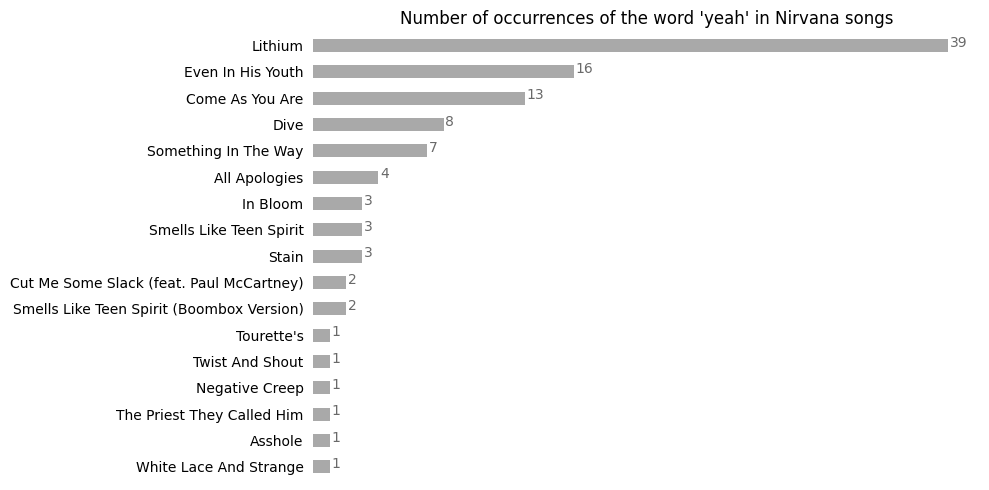

In [7]:
# produce a horizontal bar chart of df_result, sorted by count descending
import matplotlib.pyplot as plt
df_result.plot(kind='barh', figsize=(10, 5))
plt.title(f"Number of occurrences of the word '{search_word}' in Nirvana songs")
plt.ylabel("")

ax = plt.gca()
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend().set_visible(False)
for i in ax.patches:
    ax.text(i.get_width()+.1, i.get_y()+0.3, str(round(i.get_width(), 2)), fontsize=10, color='dimgrey')

ax.tick_params(axis='y', which='both', left=False)
plt.tight_layout()

# color the bars light-grey except 'Heart-Shaped Box', which should be dark blue
colors = ['darkgrey' if title != 'Heart-Shaped Box' else 'darkblue' for title in df_result.index]
for patch, color in zip(ax.patches, colors):
    patch.set_facecolor(color)